# data_analyze

### Package setting

In [1]:
import numpy as np
import pandas as pd 
from PIL import Image
import shutil
import glob
import os
import random
from tqdm.auto import tqdm
import cv2
import matplotlib.pyplot as plt
import json

c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\myenv38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def rebuild_dir(target_path):
    if os.path.exists(target_path):
        shutil.rmtree(target_path)
        os.makedirs(target_path)
    else:
        os.makedirs(target_path)
        
def build_dir(target_path):
    if not os.path.exists(target_path):
        os.makedirs(target_path)

### Set Paths

In [3]:
current_path = os.getcwd()  # root


image_path = os.path.abspath(current_path + "/../../../school/CAPSTONE/main/model/Full_Image/original_data/TG/TIFF")
image_file = ([x for x in os.listdir(image_path)])

print(current_path)
print(image_path)
print(image_file)

c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train
c:\working\school\CAPSTONE\main\model\Full_Image\original_data\TG\TIFF
['1.tif', '10.tif', '11.tif', '12.tif', '13.tif', '14.tif', '2.tif', '3.tif', '4.tif', '5.tif', '6.tif', '7.tif', '8.tif', '9.tif']


In [4]:
sample_path = os.path.abspath(os.path.join(current_path, "..", "System", "results"))
# sample_path = os.path.join(current_path, "results")

sample_crop = os.path.join(sample_path,'preprocessing','Crop')  # 자른 이미지
sample_label = os.path.join(sample_path,'preprocessing','Label')  # 자른 라벨

sample_prediction = os.path.join(sample_path,'prediction')  # 결과 이미지들
# sample_segmentation = os.path.join(current_path,"results",'prediction')  # 결과 마스크들/
sample_segmentation =  os.path.join(sample_path,'segmentation')  # 결과 마스크들

print(sample_prediction)
print(sample_segmentation)

c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction
c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\segmentation


In [6]:
# rebuild_dir(sample_crop)
# rebuild_dir(sample_label)
# rebuild_dir(sample_prediction)
# rebuild_dir(sample_segmentation)

### pandas dataframe

In [5]:
pd.set_option('display.max_colwidth', 5500)

base_name = ['.'.join(x.split('.')[:1]) for x in image_file]
df = pd.DataFrame({
    'base_names': base_name,
    'file_name': image_file,
    'file_dir': [os.path.join(image_path, x) for x in image_file],
    'autolabeling_dir': [os.path.join(sample_label, f'{x}_crop') for x in base_name],  # 라벨링 결과
    'img_dir': [os.path.join(sample_prediction, f'{x}_result') for x in base_name]})  # 라벨링 비교 이미지 결과
df

,base_names,file_name,file_dir,autolabeling_dir,img_dir
0,1,1.tif,c:\working\school\CAPSTONE\main\model\Full_Image\original_data\TG\TIFF\1.tif,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\preprocessing\Label\1_crop,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\1_result
1,10,10.tif,c:\working\school\CAPSTONE\main\model\Full_Image\original_data\TG\TIFF\10.tif,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\preprocessing\Label\10_crop,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\10_result
2,11,11.tif,c:\working\school\CAPSTONE\main\model\Full_Image\original_data\TG\TIFF\11.tif,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\preprocessing\Label\11_crop,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\11_result
3,12,12.tif,c:\working\school\CAPSTONE\main\model\Full_Image\original_data\TG\TIFF\12.tif,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\preprocessing\Label\12_crop,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\12_result
4,13,13.tif,c:\working\school\CAPSTONE\main\model\Full_Image\original_data\TG\TIFF\13.tif,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\preprocessing\Label\13_crop,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\13_result
5,14,14.tif,c:\working\school\CAPSTONE\main\model\Full_Image\original_data\TG\TIFF\14.tif,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\preprocessing\Label\14_crop,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\14_result
6,2,2.tif,c:\working\school\CAPSTONE\main\model\Full_Image\original_data\TG\TIFF\2.tif,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\preprocessing\Label\2_crop,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\2_result
7,3,3.tif,c:\working\school\CAPSTONE\main\model\Full_Image\original_data\TG\TIFF\3.tif,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\preprocessing\Label\3_crop,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\3_result
8,4,4.tif,c:\working\school\CAPSTONE\main\model\Full_Image\original_data\TG\TIFF\4.tif,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\preprocessing\Label\4_crop,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\4_result
9,5,5.tif,c:\working\school\CAPSTONE\main\model\Full_Image\original_data\TG\TIFF\5.tif,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\preprocessing\Label\5_crop,c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\5_result


### 누끼

In [6]:
def blurrd_img(tiff_files):
    ## 원본 이미지
    img = cv2.imread(tiff_files, cv2.IMREAD_COLOR)

    ## 블러 처리
    blur = cv2.medianBlur(img, 9)

    hsv_img = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

    ## hsv 채널분리
    h, s, v = cv2.split(hsv_img)

    _, thr_s = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    __cached__, thr_v = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    thr_v -= 255

    # Contours 찾기
    contours_s, _ = cv2.findContours(thr_s, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_v, _ = cv2.findContours(thr_v, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    contour_img_s = np.zeros_like(thr_s)
    cn_filled_s = cv2.drawContours(contour_img_s, contours_s, -1, (255,255,255), -1)

    contour_img_v = np.zeros_like(thr_v)
    cn_filled_v = cv2.drawContours(contour_img_v, contours_v, -1, (255,255,255), -1)

    ## hsv 채널 중 s,v 채널 영역 합침
    mask_area = cv2.bitwise_and(cn_filled_s, cn_filled_v)

    # Contours 찾기
    contours, _ = cv2.findContours(mask_area, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Contours를 그릴 이미지 생성
    contour_img = np.zeros_like(mask_area)

    # Contours 그리기
    cn_filled = cv2.drawContours(contour_img, contours, -1, (255,255,255), -1)

    result_img = img.copy()
    result_img[cn_filled==0] = [255, 255, 255]  # 흰색으로 채우기

    return result_img, mask_area

### contour

In [7]:
def count_pixels_in_mask(mask):
    """마스크 안의 픽셀 수를 반환합니다."""
    return np.sum(mask)

def draw_contours_on_image(image, mask, color, full_mask=None):
    """
    Mask의 테두리를 이미지에 그립니다.
    (수정) full_mask가 제공되면, full_mask 영역 안에 포함된 contour만 그립니다.
    """
    
    # 1. 예측 마스크(U-Net)에서 모든 contour 찾기
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    image_with_contours = image.copy()
    
    filtered_contours = []
    
    if full_mask is not None:
        # 2. 필터링 로직: full_mask 영역 안에 있는 contour만 선택
        for cnt in contours:
            try:
                # 3. 예측 contour의 중심점 계산
                M = cv2.moments(cnt)
                if M['m00'] == 0: continue # 면적이 0인 contour 방지
                
                cx = int(M['m10'] / M['m00'])
                cy = int(M['m01'] / M['m00'])

                # 4. 중심점이 full_mask(blurrd_img 결과)의 흰색 영역(255)에 있는지 확인
                # (배열 인덱싱은 y, x 순서)
                if full_mask[cy, cx] != 0:
                    filtered_contours.append(cnt)
            except Exception as e:
                # 중심점 계산이 불가능한 아주 작은 contour 등 예외 처리
                pass 
    else:
        # full_mask가 없으면 모든 contour를 그림
        filtered_contours = contours
        
    # 5. 필터링된 contour만 원본 이미지에 그리기
    cv2.drawContours(image_with_contours, filtered_contours, -1, color, 10)
    return image_with_contours


In [13]:
print(sample_segmentation)

c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\model_train\results\prediction


In [14]:
sample_segmentation = os.path.join(sample_path,'segmentation')  # 결과 마스크들

In [8]:
# for i in df.index:
for i in df.index[10:]:
    print(df.loc[i,'file_name'])

    image = cv2.imread(df.loc[i,'file_dir'], cv2.IMREAD_COLOR)  # 원본이미지

    name = df.loc[i,'base_names']
    result_path = df.loc[i, 'img_dir']
    rebuild_dir(result_path)
    
    prediction_image = cv2.imread(os.path.join(sample_segmentation,f"{name}_mask.png"), cv2.IMREAD_GRAYSCALE)  # 예측 마스크
    if name == "11":
        continue
    img, full_contour = blurrd_img(df.loc[i,'file_dir'])
    image_with_prediction_contours = draw_contours_on_image(img, prediction_image.astype(np.uint8), (0, 255, 0), full_contour)  # 초록색 prediction 테두리
    
    if prediction_image is None:
        print(f"마스크 또는 예측 이미지를 불러올 수 없습니다: {df.loc[i,'file_name']}")
        continue
    
    cv2.imwrite(os.path.join(result_path, f"{name}_original.png"), image)
    cv2.imwrite(os.path.join(result_path, f"{name}_blurrd.png"), img)
    cv2.imwrite(os.path.join(result_path, f"{name}_contours.png"), image_with_prediction_contours)
    cv2.imwrite(os.path.join(sample_segmentation, f"{name}_mask.png"), prediction_image)

    # fig, axes = plt.subplots(1, 3, figsize=(21, 7), facecolor='white')

    # axes[0].set_title('Original Image', fontsize = 10, pad = 10)
    # axes[0].axis('off')
    # axes[0].imshow(image)
    
    # axes[1].set_title('Contours Image(Green)', fontsize = 10, pad = 10)
    # axes[1].axis('off')
    # axes[1].imshow(image_with_prediction_contours)

    # axes[2].set_title('Prediction Mask', fontsize = 10, pad = 10)
    # axes[2].axis('off')
    # axes[2].imshow(prediction_image, cmap='gray')
    
    
    # plt.show()

6.tif
7.tif
8.tif
9.tif


In [9]:
name = df.loc[2,'base_names']
print(name)
image = cv2.imread(df.loc[2,'file_dir'], cv2.IMREAD_COLOR)  # 원본이미지
result_path = df.loc[2, 'img_dir']
img, full_contour = blurrd_img(df.loc[2,'file_dir'])    
prediction_image = cv2.imread(os.path.join(sample_segmentation, f"{name}_mask.png"), cv2.IMREAD_GRAYSCALE)  # 예측 마스크
image_with_prediction_contours = draw_contours_on_image(img, prediction_image.astype(np.uint8), (0, 255, 0), full_contour)  # 초록색 prediction 테두리
cv2.imwrite(os.path.join(result_path, f"{name}_original.png"), image)
cv2.imwrite(os.path.join(result_path, f"{name}_blurrd.png"), img)
cv2.imwrite(os.path.join(result_path, f"{name}_contours.png"), image_with_prediction_contours)

11


True

### histogram

In [10]:
def analyze_segmentation_mask(mask_path, bin_size=1000):
    """
    저장된 전체 마스크 이미지를 분석하여 Contour 개수와 크기 분포를 반환합니다.

    :param mask_path: 분석할 마스크 이미지 파일 경로 (예: '..._mask.png')
    :param bin_size: 히스토그램의 구간 크기 (기본값: 1000 픽셀)
    :return: (전체 Contour 개수, 히스토그램 카운트, 히스토그램 구간) 튜플
    """
    
    # 1. 마스크 이미지를 그레이스케일로 로드
    mask_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    if mask_image is None:
        print(f"오류: 이미지를 로드할 수 없습니다. 경로: {mask_path}")
        return 0, None, None

    # 2. Contour 찾기
    # cv2.RETR_EXTERNAL: 가장 바깥쪽의 Contour만 찾습니다.
    # cv2.CHAIN_APPROX_SIMPLE: Contour의 꼭짓점만 저장하여 메모리를 절약합니다.
    contours, _ = cv2.findContours(
        mask_image, 
        cv2.RETR_EXTERNAL, 
        cv2.CHAIN_APPROX_SIMPLE
    )
    
    total_contours = len(contours)
    print(f"--- 마스크 분석 결과 ('{os.path.basename(mask_path)}') ---")
    print(f"✅ 전체 Contour 개수: {total_contours} 개")
    
    if total_contours == 0:
        print("분석할 Contour가 없습니다.")
        return 0, None, None

    # 3. 각 Contour의 픽셀 면적(Area) 계산
    contour_areas = [cv2.contourArea(cnt) for cnt in contours]
    
    # 4. 1000 단위로 찢어서 히스토그램화
    max_area = max(contour_areas)
    
    # 히스토그램 구간(bins) 설정
    # 예: max_area가 3500이면, bins = [0, 1000, 2000, 3000, 4000]
    bins = np.arange(0, max_area + bin_size, bin_size)
    
    # NumPy를 사용하여 히스토그램 계산
    hist_counts, bin_edges = np.histogram(contour_areas, bins=bins)
    
    # # 5. 결과 출력
    # print("\n--- Contour 크기 분포 (히스토그램) ---")
    # for i in range((total_contours)):
    #     print(f"{i}번째 contour 크기: {contour_areas[i]} 픽셀")
        
    return total_contours, hist_counts, bin_edges

In [11]:
def plot_histogram_skip_empty(hist_counts, bin_edges, save_path ,name):
    """
    계산된 히스토그램 데이터에서 카운트가 0인 구간을 '건너뛰고' (제외하고)
    막대그래프로 시각화하고 저장합니다.
    """
    
    if hist_counts is None or np.sum(hist_counts) == 0:
        print("시각화할 히스토그램 데이터가 없습니다.")
        return

    # --- 수정된 부분: 10이하인 구간 필터링 ---
    
    # 1. 카운트가 0보다 큰(> 0) 구간의 인덱스를 찾습니다.
    non_zero_indices = np.where(hist_counts > 10)[0]
    
    if len(non_zero_indices) == 0:
        print("시각화할 데이터가 없습니다 (모든 구간의 카운트가 0입니다).")
        return

    # 2. 0이 아닌 카운트만 필터링합니다.
    filtered_counts = hist_counts[non_zero_indices]
    
    # 3. 필터링된 구간에 해당하는 Bin 레이블을 생성합니다.
    # 예: "0-1000", "2000-3000" (1000-2000이 비어있다면 건너뜀)
    bin_labels = []
    for i in non_zero_indices:
        label = f"{int(bin_edges[i])}-{int(bin_edges[i+1])}"
        bin_labels.append(label)
    # --- 여기까지 수정 ---

    # 4. 필터링된 데이터로 막대그래프를 생성합니다.
    # 그래프의 너비를 데이터 개수에 따라 동적으로 조절
    plt.figure(figsize=(max(10, len(bin_labels) * 0.5), 6))
    plt.bar(bin_labels, filtered_counts, color='skyblue', edgecolor='black')
    
    plt.title('Histogram of Contour Areas (10 more section)')
    plt.xlabel('Pixel Area Range (px)')
    plt.ylabel('Number of Contours (Count)')
    # plt.xticks(rotation=45, ha='right') # 레이블이 겹치지 않게 회전
    plt.tight_layout() # 레이아웃 최적화
    
    # 5. 그래프를 이미지 파일로 저장
    plt.savefig(os.path.join(save_path,f'{name}_histogram.png'))
    plt.show()
    print(f"\n✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 '{save_path}'에 저장되었습니다.")

1.tif
--- 마스크 분석 결과 ('1_mask.png') ---
✅ 전체 Contour 개수: 280 개


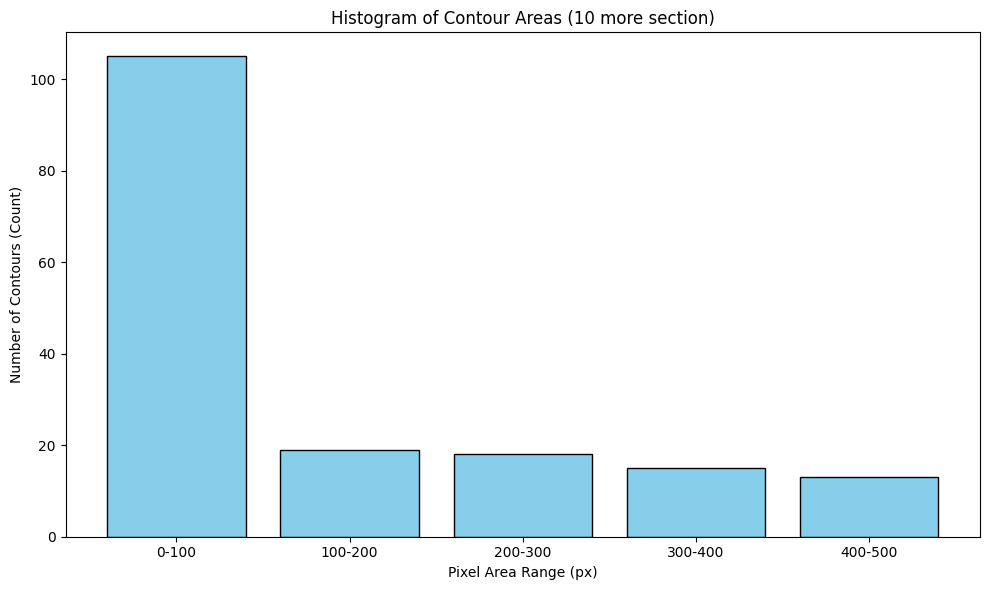


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\1_result'에 저장되었습니다.
10.tif
--- 마스크 분석 결과 ('10_mask.png') ---
✅ 전체 Contour 개수: 292 개


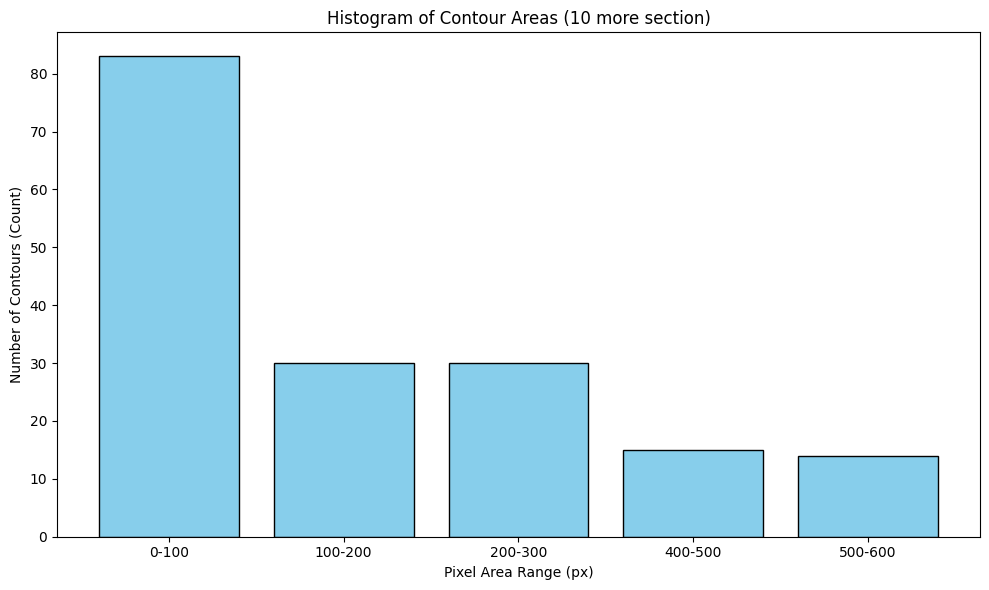


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\10_result'에 저장되었습니다.
11.tif
--- 마스크 분석 결과 ('11_mask.png') ---
✅ 전체 Contour 개수: 442 개


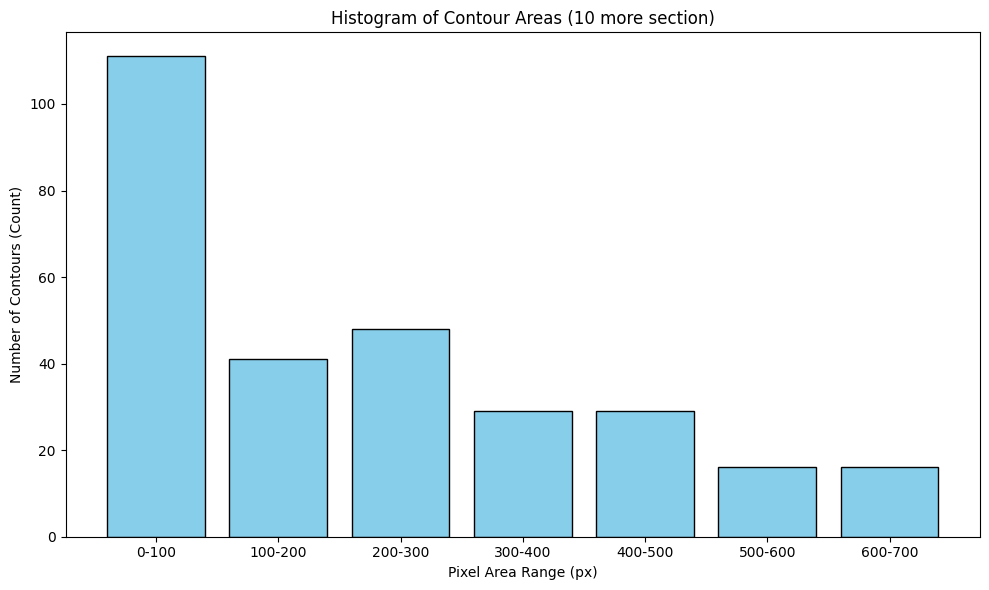


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\11_result'에 저장되었습니다.
12.tif
--- 마스크 분석 결과 ('12_mask.png') ---
✅ 전체 Contour 개수: 226 개


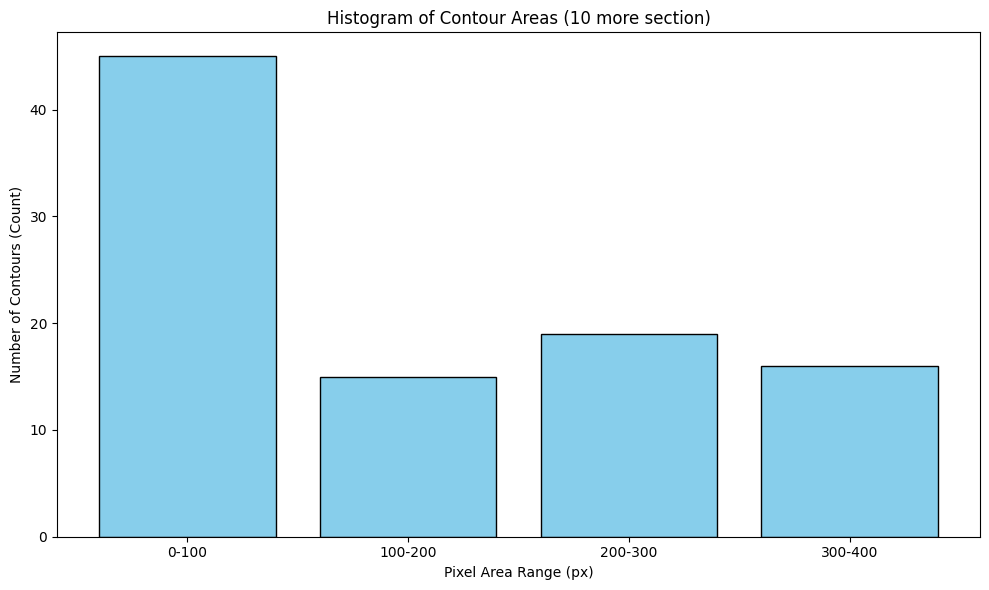


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\12_result'에 저장되었습니다.
13.tif
--- 마스크 분석 결과 ('13_mask.png') ---
✅ 전체 Contour 개수: 208 개


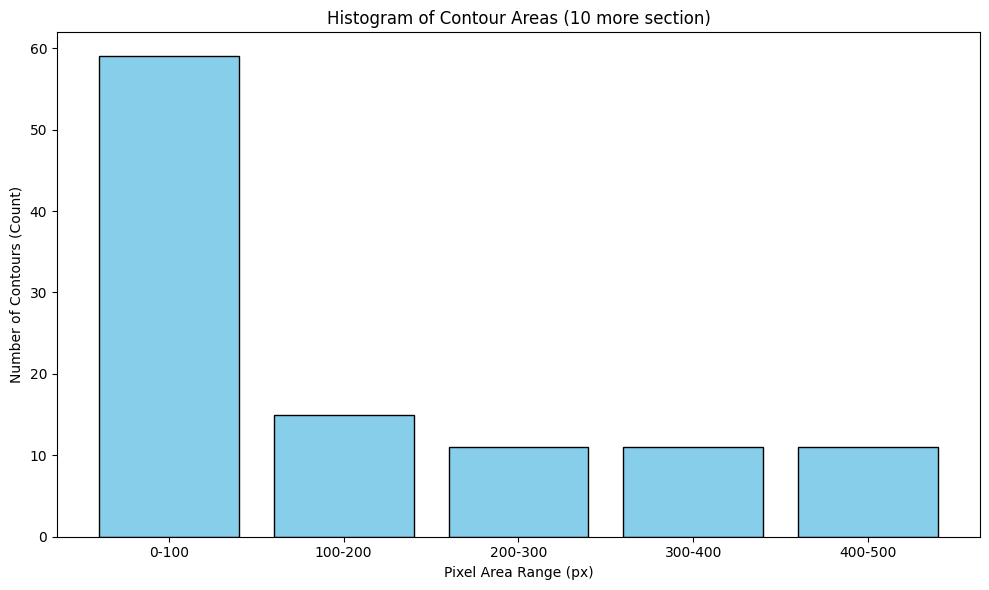


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\13_result'에 저장되었습니다.
14.tif
--- 마스크 분석 결과 ('14_mask.png') ---
✅ 전체 Contour 개수: 316 개


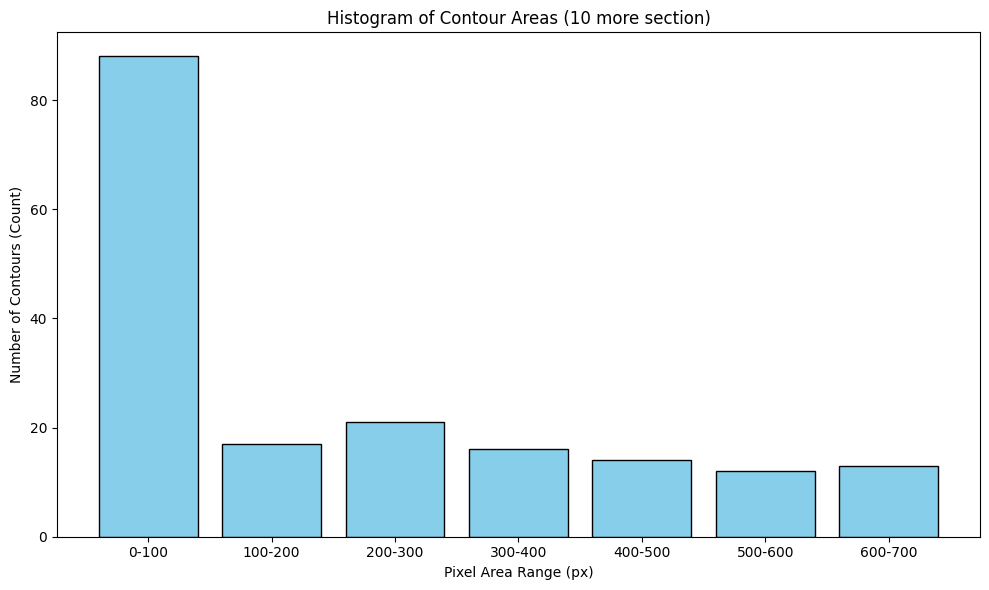


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\14_result'에 저장되었습니다.
2.tif
--- 마스크 분석 결과 ('2_mask.png') ---
✅ 전체 Contour 개수: 237 개


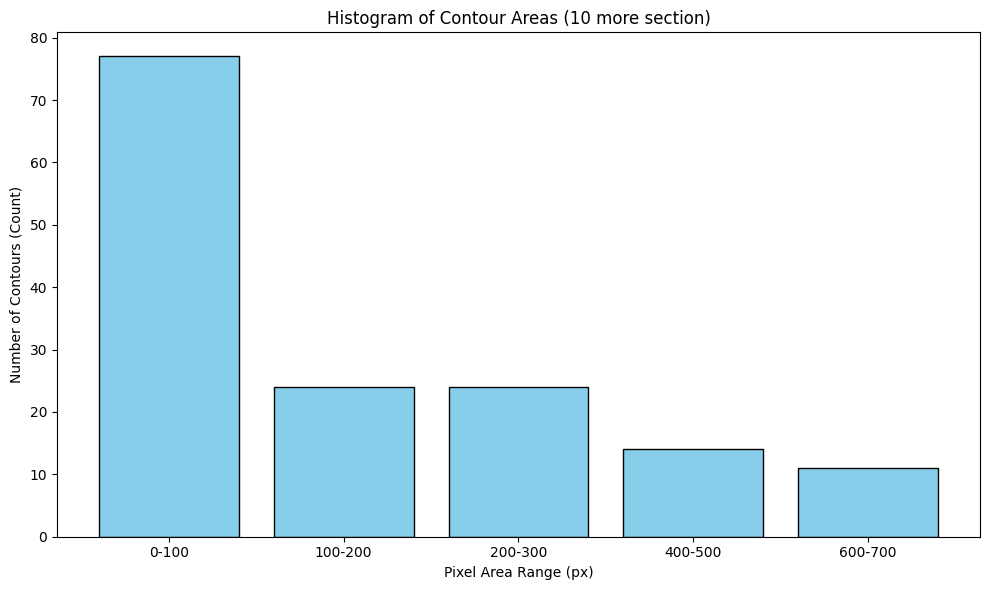


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\2_result'에 저장되었습니다.
3.tif
--- 마스크 분석 결과 ('3_mask.png') ---
✅ 전체 Contour 개수: 126 개


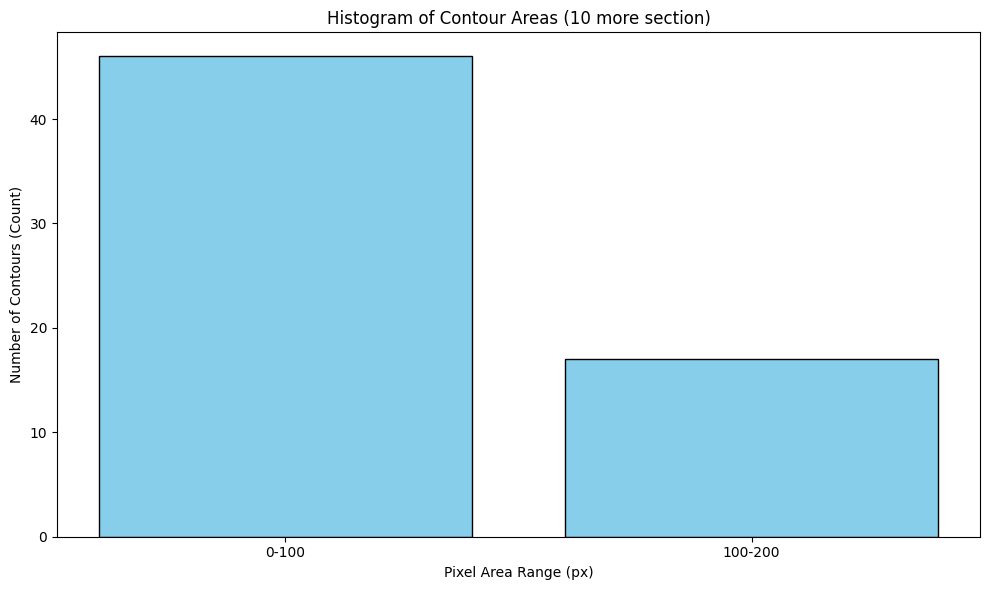


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\3_result'에 저장되었습니다.
4.tif
--- 마스크 분석 결과 ('4_mask.png') ---
✅ 전체 Contour 개수: 319 개


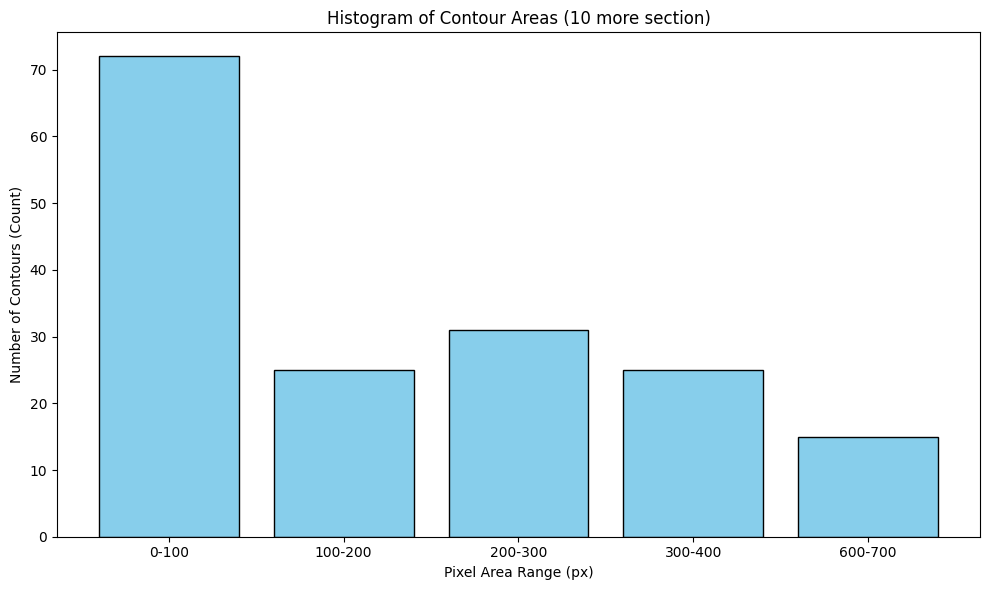


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\4_result'에 저장되었습니다.
5.tif
--- 마스크 분석 결과 ('5_mask.png') ---
✅ 전체 Contour 개수: 250 개


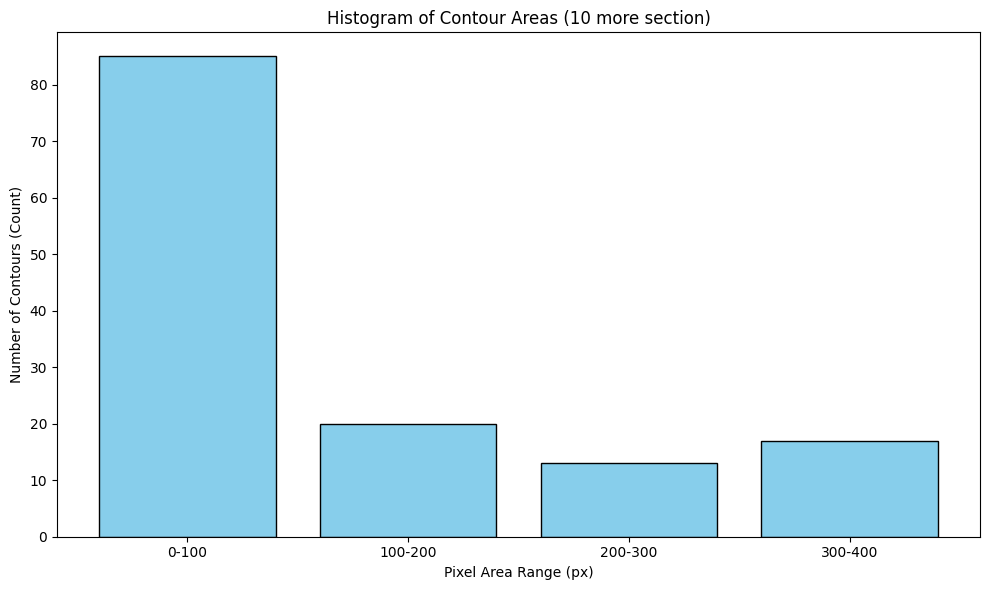


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\5_result'에 저장되었습니다.
6.tif
--- 마스크 분석 결과 ('6_mask.png') ---
✅ 전체 Contour 개수: 239 개


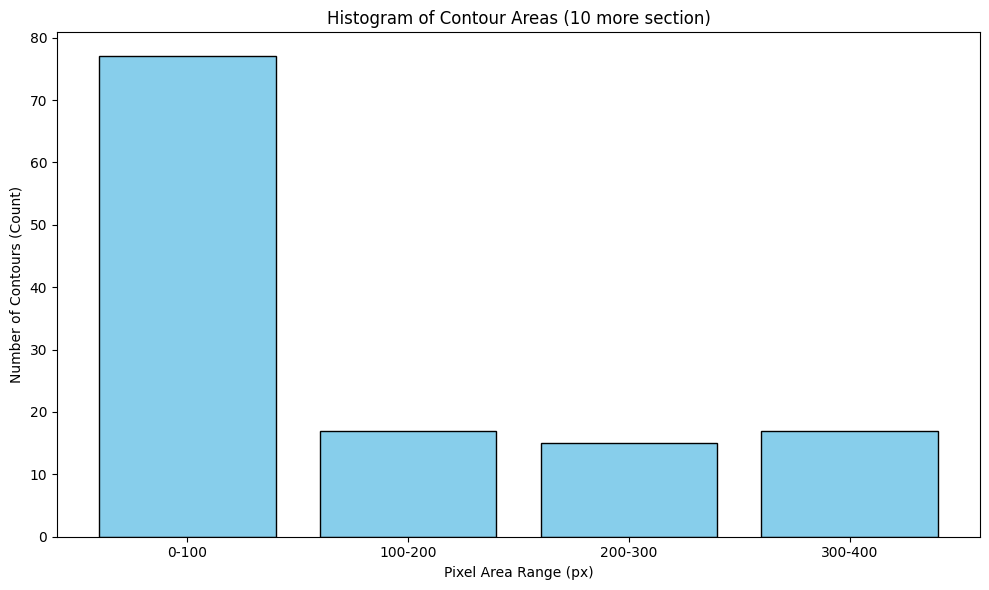


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\6_result'에 저장되었습니다.
7.tif
--- 마스크 분석 결과 ('7_mask.png') ---
✅ 전체 Contour 개수: 102 개


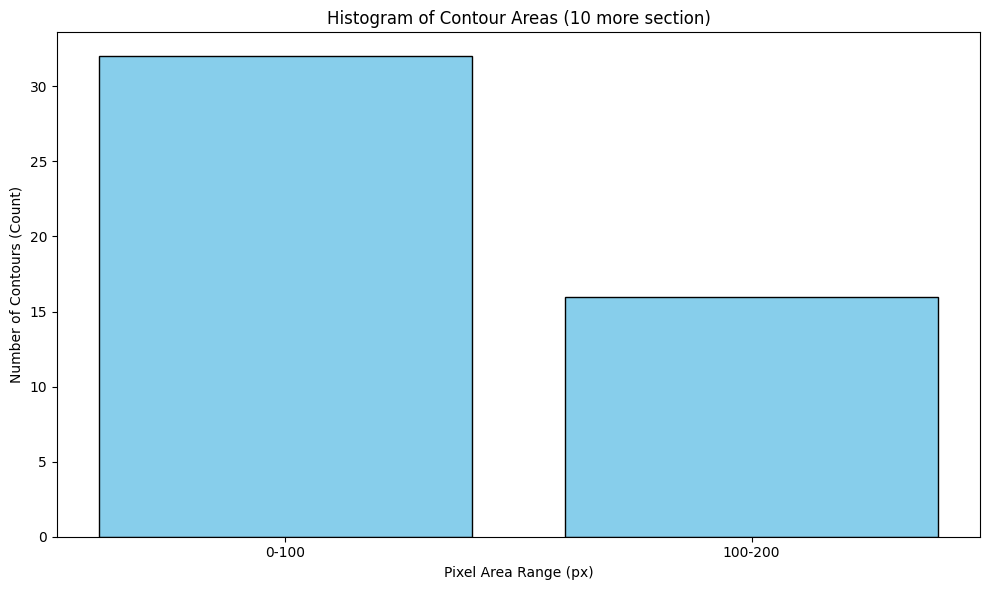


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\7_result'에 저장되었습니다.
8.tif
--- 마스크 분석 결과 ('8_mask.png') ---
✅ 전체 Contour 개수: 156 개


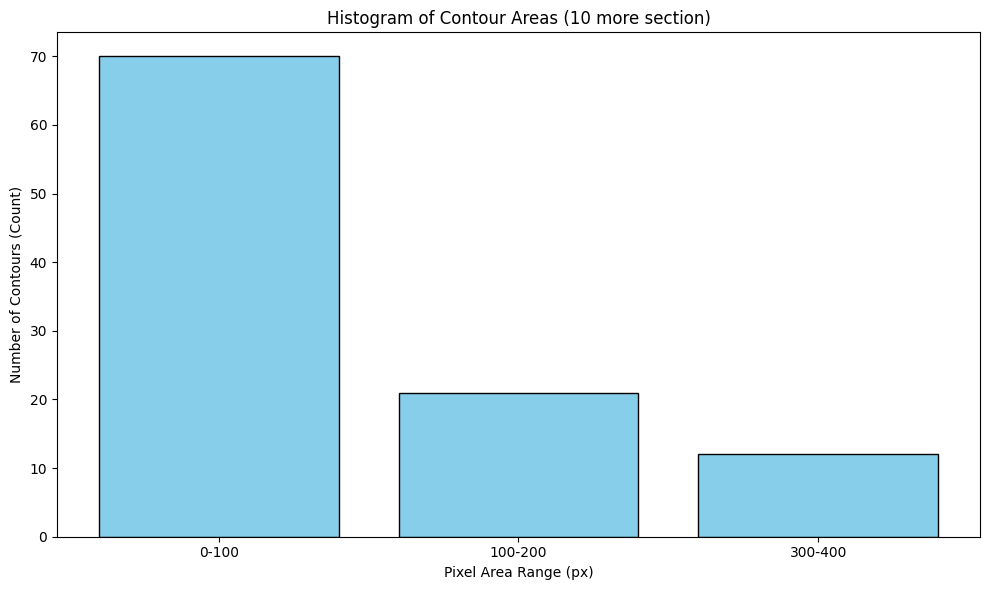


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\8_result'에 저장되었습니다.
9.tif
--- 마스크 분석 결과 ('9_mask.png') ---
✅ 전체 Contour 개수: 317 개


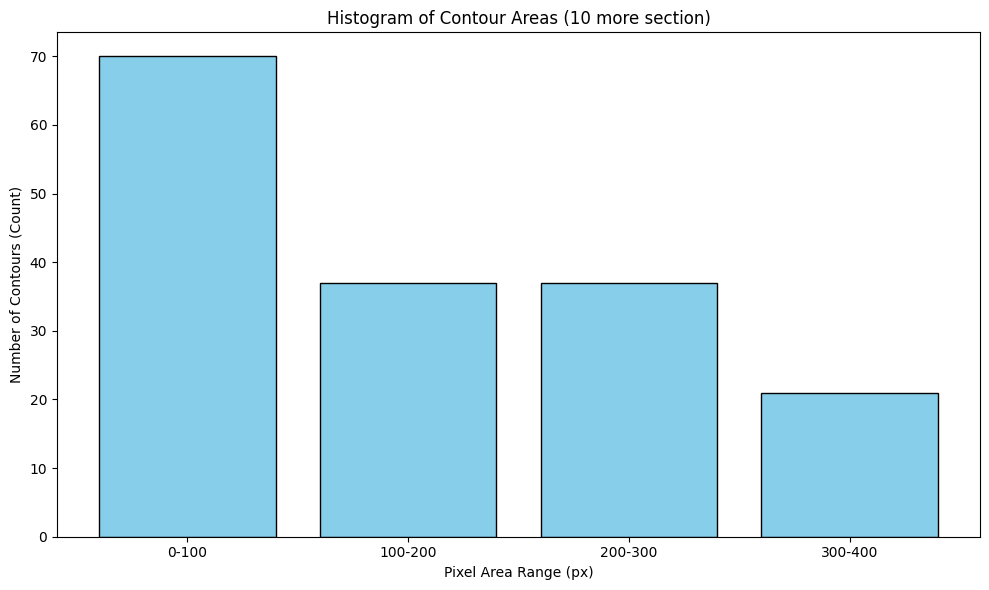


✅ (카운트가 10미만인 구간 제외) 히스토그램 그래프가 'c:\working\hbnu-swuniv-capstone-project-come-capstone25-CAPSTONE-InnoMedics\003Code\System\results\prediction\9_result'에 저장되었습니다.


In [12]:
for i in df.index:
    print(df.loc[i, "file_name"])

    result_path = df.loc[i, "img_dir"]
    name = df.loc[i, 'base_names']
    prediction_file = os.path.join(sample_segmentation, f"{name}_mask.png")

    total, hist_count, bin_edge = analyze_segmentation_mask(prediction_file, bin_size=100)
    
    # if os.path.exists(os.path.join(result_path, f"{name}_histogram.png")):    
    #    os.remove(os.path.join(result_path, f"{name}_histogram.png"))
    plot_histogram_skip_empty(hist_count, bin_edge, result_path, name)

### 시각화

1.tif


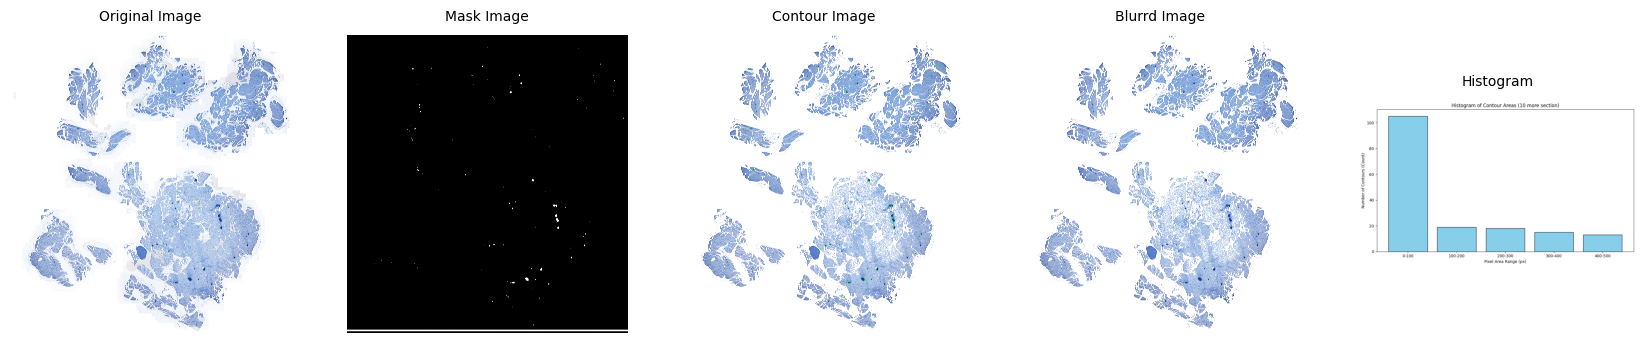

10.tif


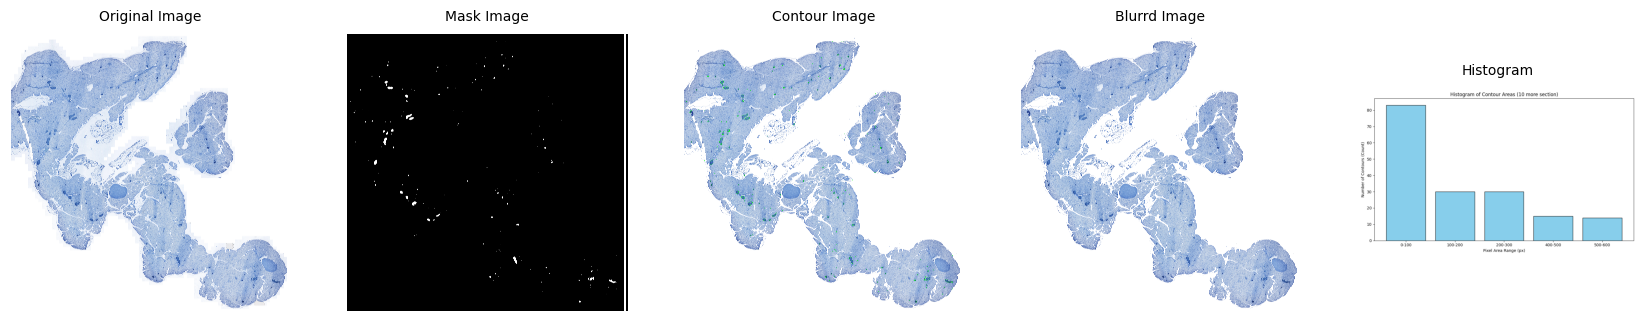

11.tif


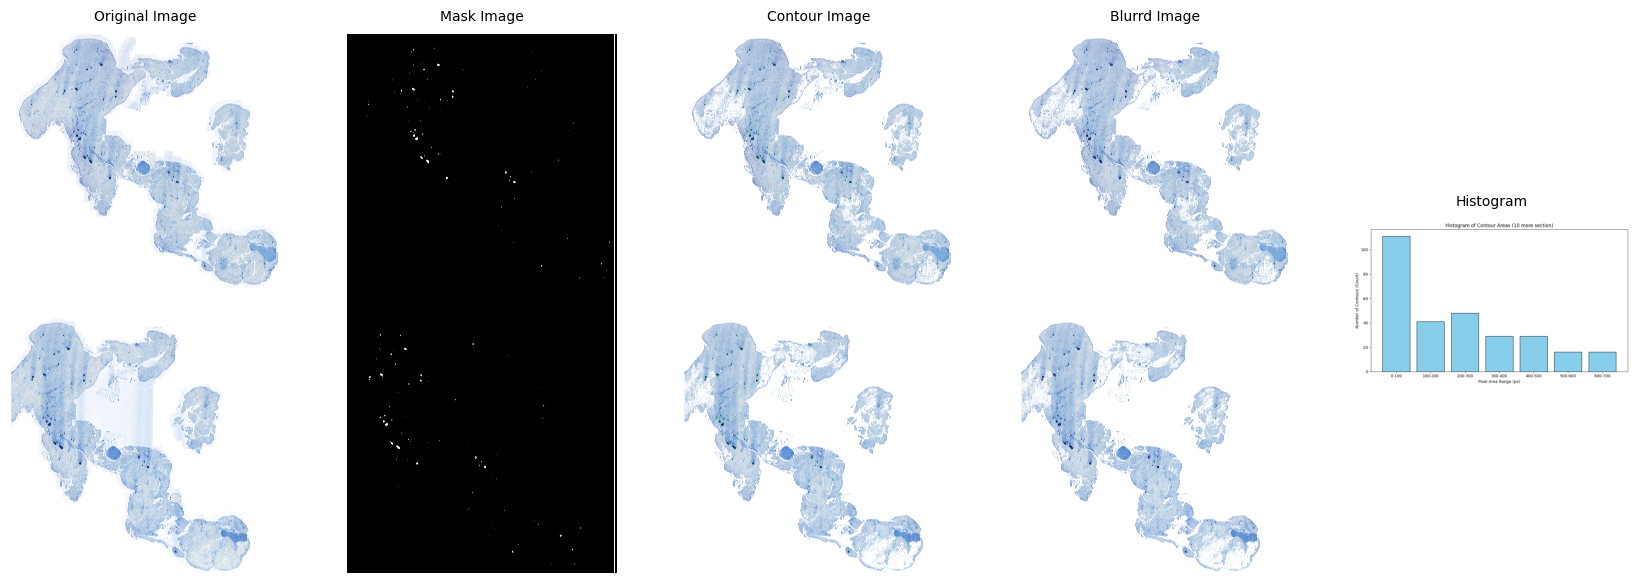

12.tif


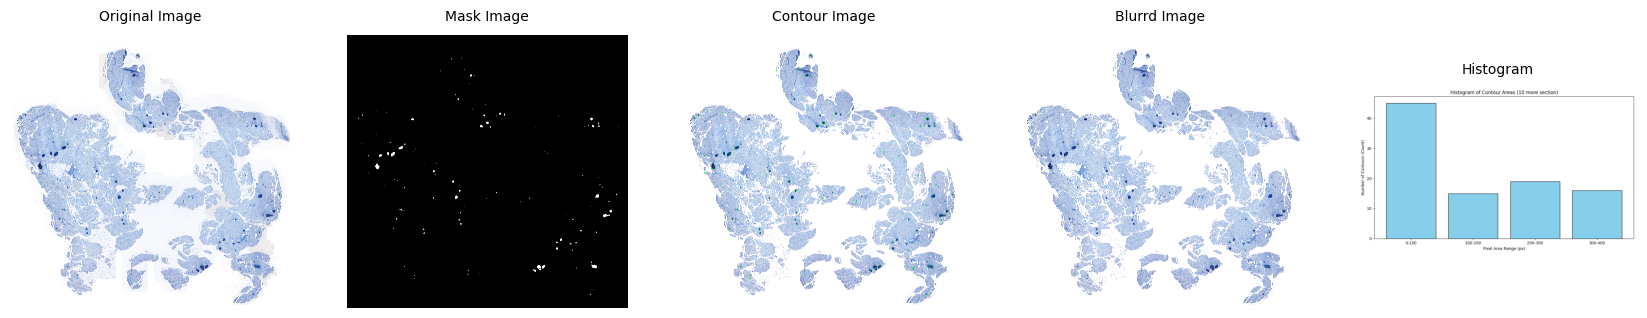

13.tif


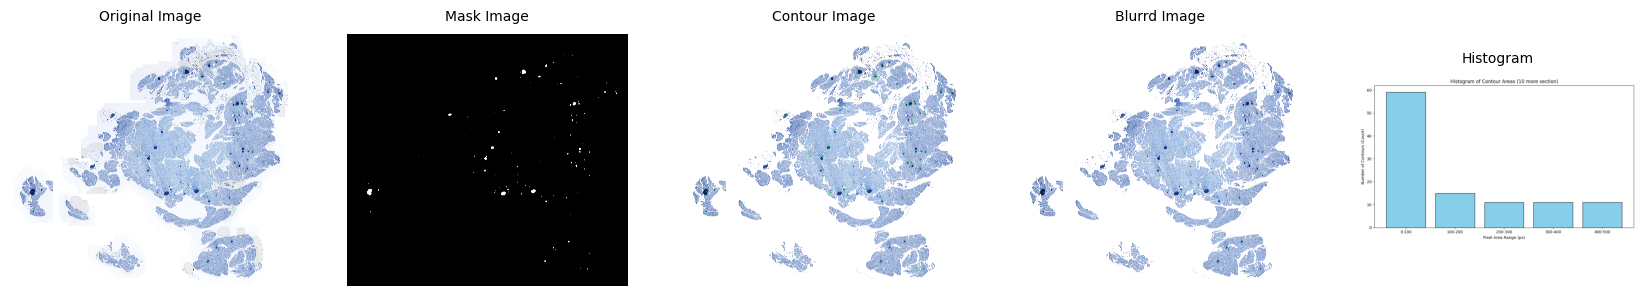

14.tif


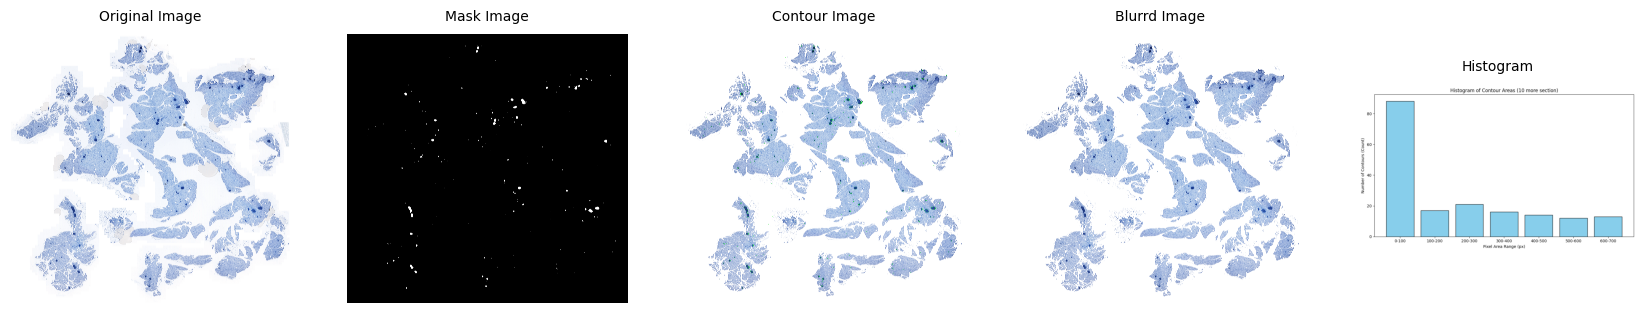

2.tif


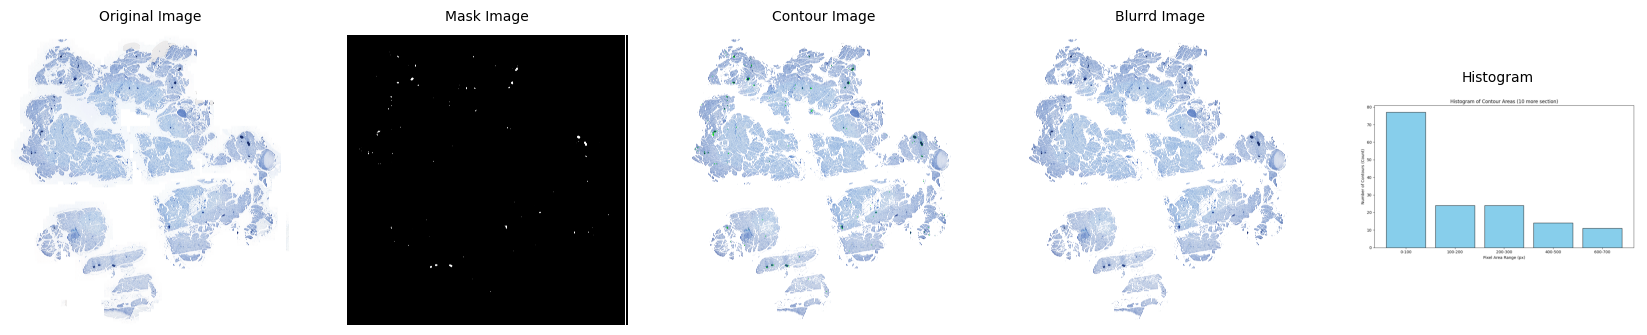

3.tif


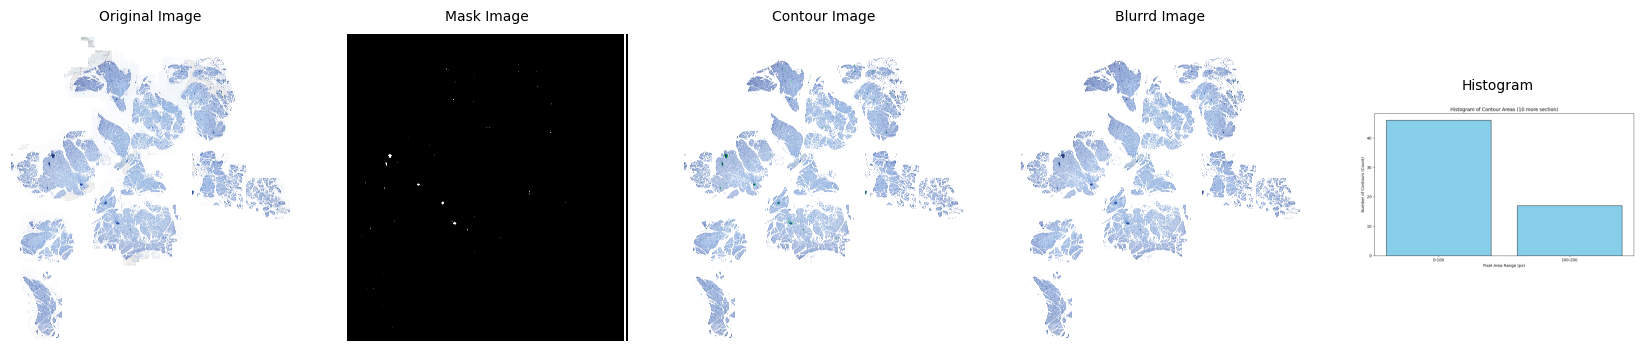

4.tif


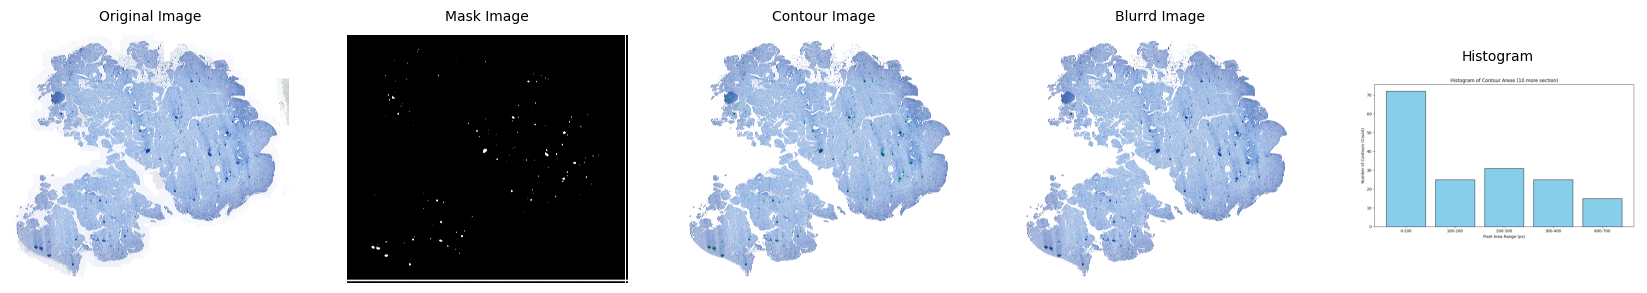

5.tif


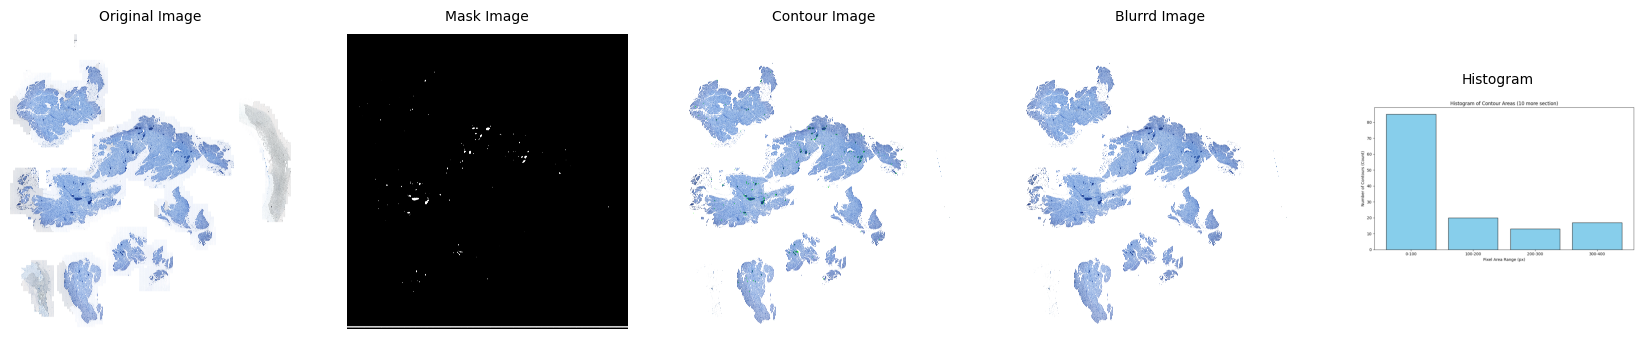

6.tif


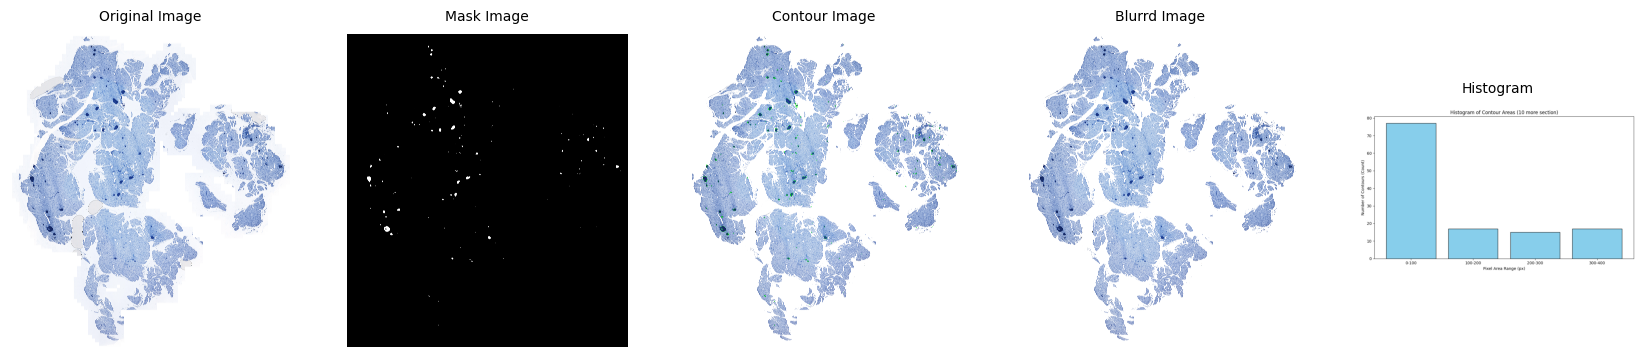

7.tif


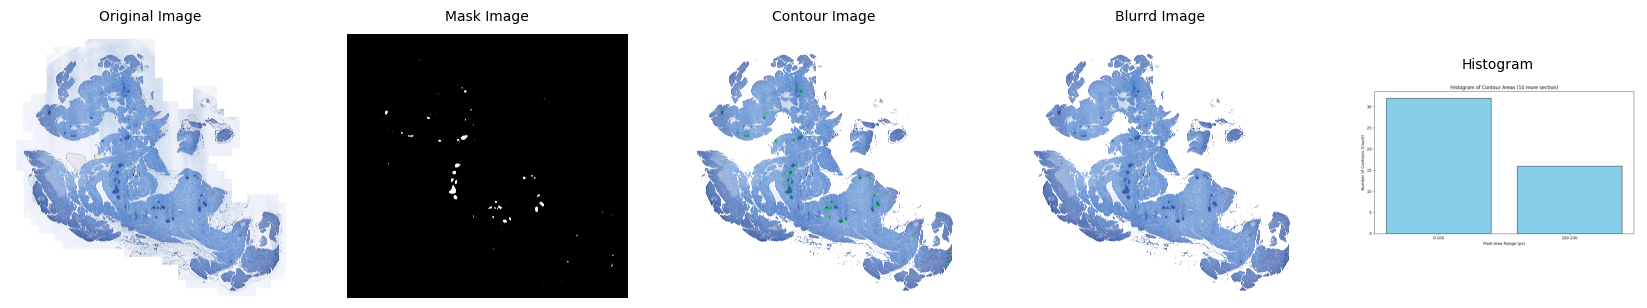

8.tif


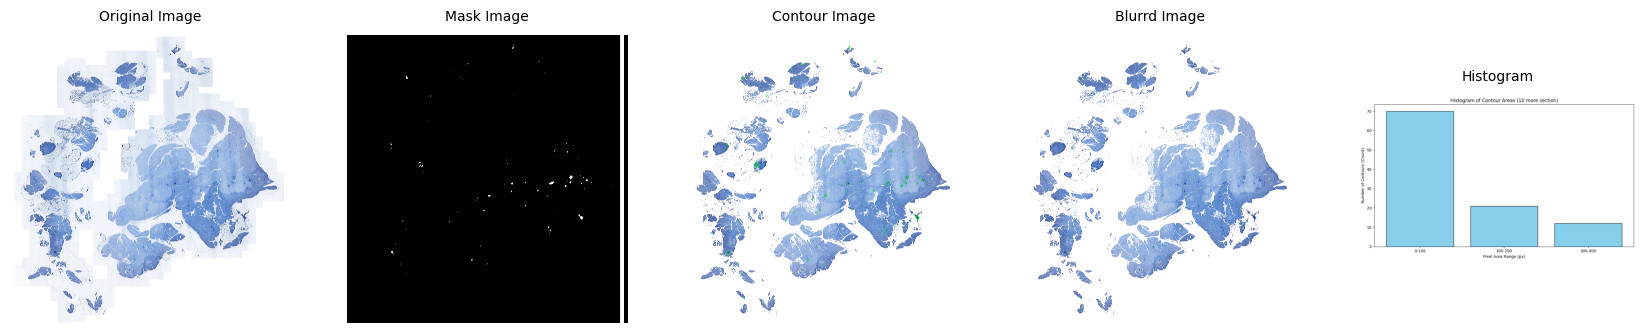

9.tif


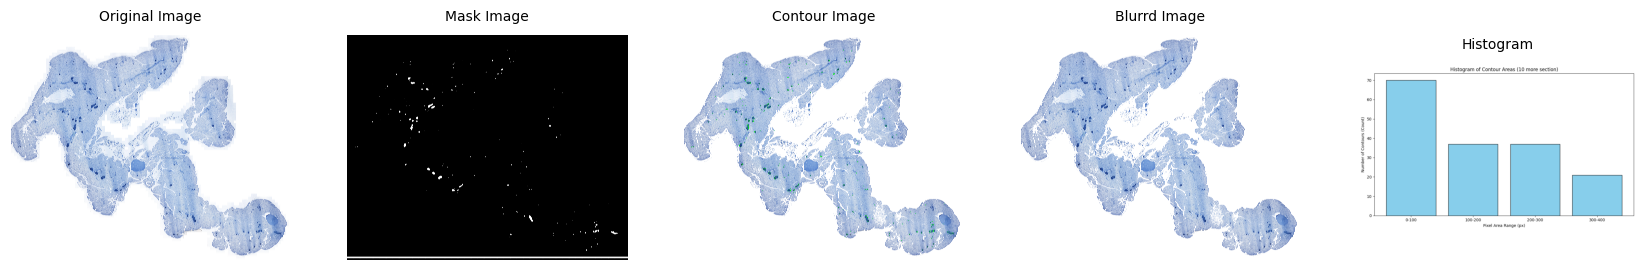

In [14]:
for i in df.index:
    print(df.loc[i,'file_name'])
    name = df.loc[i,'base_names']
    result_path = df.loc[i, 'img_dir']

    img = cv2.imread(os.path.join(result_path,f"{name}_original.png"), cv2.IMREAD_COLOR)  # 원본 이미지

    mask_img = os.path.join(sample_segmentation, f"{name}_mask.png")
    mask_img = cv2.imread(mask_img)[:,:,0]  # 결과 마스크
    
    prediction_img = cv2.imread(os.path.join(result_path, f"{name}_contours.png"), cv2.IMREAD_COLOR)  # contour 이미지
    
    img_blurrd = os.path.join(result_path, f"{name}_blurrd.png")
    img_blurrd = cv2.imread(img_blurrd, cv2.IMREAD_COLOR)  # 블러 처리 이미지

    histogram = os.path.join(result_path, f"{name}_histogram.png")
    histogram = cv2.imread(histogram, cv2.IMREAD_COLOR_RGB)  # 히스토그램 이미지

    fig, axes = plt.subplots(1, 5, figsize=(21, 7), facecolor='white')
    
    axes[0].set_title('Original Image', fontsize = 10, pad = 10)
    axes[0].axis('off')
    axes[0].imshow(img)

    axes[1].set_title('Mask Image', fontsize = 10, pad = 10)
    axes[1].axis('off')
    axes[1].imshow(mask_img, cmap='gray')
    
    axes[2].set_title('Contour Image', fontsize = 10, pad = 10)
    axes[2].axis('off')
    axes[2].imshow(prediction_img)

    axes[3].set_title('Blurrd Image', fontsize = 10, pad = 10)
    axes[3].axis('off')
    axes[3].imshow(img_blurrd)

    axes[4].set_title('Histogram', fontsize = 10, pad = 10)
    axes[4].axis('off')
    axes[4].imshow(histogram)
    
    plt.show()


In [ ]:
# for i in df.index:
#     print(df.loc[i,'file_name'])
#     name = df.loc[i,'base_names']
#     result_path = df.loc[i, 'img_dir']
    
#     img = cv2.imread(df.loc[i,'file_dir'], cv2.IMREAD_COLOR)  # 원본 이미지
#     img_blurrd, full_contour = blurrd_img(df.loc[i,'file_dir'])  # 블러 처리된 이미지
#     mask_img = cv2.imread(os.path.join(result_path, f"{name}_segmentation.png"))[:,:,0]  # 결과 마스크
#     prediction_img = draw_contours_on_image(img_blurrd, mask_img, color=(0, 255, 0), full_mask=full_contour)  # contour 이미지
#     histogram = cv2.imread(os.path.join(result_path, f"{name}_histogram.png"), cv2.IMREAD_COLOR_RGB)  # 히스토그램 이미지

#     fig, axes = plt.subplots(1, 5, figsize=(21, 7), facecolor='white')
    
#     axes[0].set_title('Original Image', fontsize = 10, pad = 10)
#     axes[0].axis('off')
#     axes[0].imshow(img)

#     axes[1].set_title('Mask Image', fontsize = 10, pad = 10)
#     axes[1].axis('off')
#     axes[1].imshow(mask_img, cmap='gray')
    
#     axes[2].set_title('Contour Image', fontsize = 10, pad = 10)
#     axes[2].axis('off')
#     axes[2].imshow(prediction_img)

#     axes[3].set_title('Blurrd Image', fontsize = 10, pad = 10)
#     axes[3].axis('off')
#     axes[3].imshow(img_blurrd)

#     axes[4].set_title('Histogram', fontsize = 10, pad = 10)
#     axes[4].axis('off')
#     axes[4].imshow(histogram)
    
#     plt.show()


1.tif
